In [1]:
import os
import sys
sys.path.insert(0, '/home/cyborg/ccal')
import numpy as np
import pandas as pd

In [2]:
from ccal.support import read_gct
from ccal.visualize import plot_onco_gps

==================== Computational Cancer Analysis Library ====================
<19:11:08> Checking library dependencies ...
<19:11:08> Using the following libraries:
<19:11:08> 	scipy (v0.18.0)
<19:11:08> 	statsmodels (v0.6.1)
<19:11:08> 	scikit-learn (v0.17.1)
<19:11:08> 	seaborn (v0.7.1)
<19:11:08> 	rpy2 (v2.8.2)
<19:11:08> 	pandas (v0.18.1)
<19:11:08> 	matplotlib (v1.5.1)
<19:11:08> 	numpy (v1.11.1)
<19:11:08> Planted a random seed 20121020.


In [3]:
h = read_gct('/home/cyborg/Downloads/KRAS_Matrix.gct')
h

,A101D_SKIN,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A2780_OVARY,A375_SKIN,A498_KIDNEY,A549_LUNG,A673_BONE,A704_KIDNEY,...,WM88_SKIN,WM983B_SKIN,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
C1 ERBB3/PI3K,168.131405,129.725766,377.404069,362.711453,9.369074e-01,158.724163,119.400378,0.000210,0.004952,8.571483e-01,...,585.491029,385.122062,1818.608008,84.003751,1277.520803,1.728721,184.398934,9.741989e+01,5082.183366,5351.782807
C2 MYC/E2F,483.251169,1950.018971,3822.655971,1603.658535,4.670154e+03,2296.220321,629.974176,1713.670249,2829.316181,1.344051e+02,...,1105.890049,960.893129,166.582445,600.054507,183.987490,438.311222,492.037153,2.354840e+03,1496.118573,1348.838924
C3 RAS/WNT/PI3K,439.726317,22.736261,172.500778,83.125036,5.141380e+02,472.550649,255.885980,731.607519,198.684846,1.238072e+03,...,63.902696,472.343108,2565.320354,550.844955,674.918046,0.042286,341.714194,1.023935e+02,351.573283,633.947093
C4 EMT,966.200556,3426.472466,1488.533822,813.955828,1.265051e+03,1217.785762,1476.469767,818.854558,2082.604059,4.538614e+02,...,308.532760,527.622789,6.637868,683.888846,193.399744,2604.253499,4932.528146,3.081563e+03,813.970319,1063.429775
C5 HNF1/PAX8,621.851935,545.796031,1203.360956,559.090216,8.182869e+02,0.004631,4064.776254,3492.567151,912.707925,5.407699e+03,...,1092.457524,539.188910,500.738717,151.062200,346.466629,1385.595701,345.069044,1.981547e+02,529.163425,315.949640
C6 BRAF/MAPK,7108.209937,1151.021920,1459.616544,6095.727879,8.831644e+02,4668.522531,782.690535,0.010035,1343.979567,1.199546e+03,...,6829.814634,6937.777764,684.392291,303.326209,616.035263,104.718498,1294.849127,2.308580e+03,253.340476,127.267622
C7 TNF/NFkB,926.870311,1695.888327,317.709438,845.612885,8.470000e-12,1321.968107,1866.760983,2007.808655,0.010358,1.314780e+03,...,236.227343,558.271889,1905.244084,978.167113,1855.723176,1945.991013,1281.674983,1.148548e+03,7.174578,0.047030
C8 MYC,185.486458,440.182849,612.900966,421.644949,1.658595e+03,382.962557,335.230484,794.001289,2073.370211,5.063588e+02,...,281.672708,411.984183,49.340093,634.943057,487.021549,128.875089,461.903053,8.667619e+02,618.811678,446.313178
C9 KRAS/AP1,11.614544,563.585385,696.623847,0.583520,3.648544e+02,0.328320,532.495555,428.003493,804.830531,1.610000e-14,...,441.295270,136.401597,2164.184208,5969.043425,4280.309840,3198.014049,559.379328,9.820000e-09,632.929594,433.495716


In [4]:
memberships = pd.read_csv('/home/cyborg/Downloads/KRAS_membership.gct', sep='\t')
states_17_membership = [int(x[1:]) for x in memberships.ix[:, 'k_17']]
memberships

,SAMPLE,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9,k_10,...,k_13,k_14,k_15,k_16,k_17,k_18,k_19,k_20,k_21,k_22
0,A101D_SKIN,S1,S1,S1,S1,S1,S1,S1,S1,S1,...,S1,S1,S1,S1,S1,S1,S1,S1,S1,S1
1,A172_CENTRAL_NERVOUS_SYSTEM,S1,S1,S1,S1,S2,S2,S2,S2,S2,...,S2,S2,S2,S2,S2,S2,S2,S2,S2,S2
2,A204_SOFT_TISSUE,S1,S2,S2,S2,S3,S3,S3,S3,S3,...,S3,S3,S3,S3,S3,S3,S3,S3,S3,S3
3,A2058_SKIN,S1,S1,S1,S1,S1,S1,S1,S1,S1,...,S1,S1,S1,S1,S1,S1,S1,S1,S1,S1
4,A2780_OVARY,S1,S2,S2,S2,S3,S3,S3,S3,S3,...,S3,S3,S3,S3,S3,S3,S3,S3,S3,S3
5,A375_SKIN,S1,S1,S1,S1,S1,S1,S1,S1,S1,...,S1,S1,S1,S1,S1,S1,S1,S1,S1,S1
6,A498_KIDNEY,S1,S1,S3,S3,S4,S4,S4,S4,S4,...,S4,S4,S4,S4,S4,S4,S4,S4,S4,S4
7,A549_LUNG,S1,S1,S3,S3,S4,S2,S5,S5,S5,...,S4,S4,S4,S5,S5,S5,S5,S5,S5,S5
8,A673_BONE,S1,S2,S2,S2,S3,S3,S3,S3,S3,...,S3,S3,S3,S3,S3,S3,S3,S3,S3,S3
9,A704_KIDNEY,S1,S1,S3,S3,S4,S4,S4,S4,S4,...,S4,S4,S4,S4,S4,S4,S4,S6,S4,S6


In [5]:
# plot_onco_gps(h, 17, np.array(states_17_membership), output_filename='/home/cyborg/Desktop/kras17.pdf')

# BCL2

In [6]:
rpkm = read_gct('/home/cyborg/data/ccle/ccle_rpkm.gct')
rpkm

,X22RV1_PROSTATE,X2313287_STOMACH,X253JBV_URINARY_TRACT,X253J_URINARY_TRACT,X42MGBA_CENTRAL_NERVOUS_SYSTEM,X5637_URINARY_TRACT,X59M_OVARY,X639V_URINARY_TRACT,X647V_URINARY_TRACT,X697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
DDX11L1,0.000000,0.037645,0.000000,0.065146,0.000000,0.013754,0.014674,0.030780,0.000000,0.044828,...,0.000000,0.000000,0.000000,0.076018,0.000000,0.047507,0.000000,0.085375,0.264218,0.017189
WASH7P,12.899055,11.335626,6.707684,6.902527,7.734817,6.278403,4.526536,6.613034,4.676380,5.966728,...,14.548943,4.440240,10.130865,6.284576,6.086228,7.598896,6.589607,8.056831,17.969017,8.357800
MIR1302-11,0.065438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064776,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.199956,0.000000,0.000000,0.000000,0.000000
FAM138A,0.000000,0.008709,0.224704,0.165778,0.000000,0.006363,0.000000,0.014241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017183,0.173803,0.000000,0.000000
OR4G11P,0.000000,0.000000,0.019427,0.039088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP11-34P13.7,1.057129,1.389891,0.375930,0.296574,0.423504,0.340058,0.203475,0.239109,0.588670,0.334509,...,0.310414,0.711012,0.561563,0.222245,1.035064,0.642867,0.496350,0.445000,1.715967,0.809798
RP11-34P13.8,1.396080,2.277732,0.484560,0.459630,0.589406,0.558692,0.351381,0.414583,0.938389,0.568658,...,0.299815,1.238811,0.921007,0.243788,1.513863,0.832871,0.381124,0.773925,2.866831,1.131894
RP11-34P13.11,6.348042,6.669297,1.278424,0.920911,1.043076,4.146171,3.380085,5.842492,1.005078,1.220703,...,9.984682,18.842075,7.166963,6.678930,3.402646,1.464884,1.273058,1.455069,11.421878,2.654244
RP11-34P13.14,2.171818,3.746824,1.243782,1.222855,1.798254,2.041315,2.229213,3.977177,0.755605,1.669872,...,2.815943,8.685014,4.615791,3.982125,3.023804,1.659075,2.658776,0.834821,12.687352,2.491182


In [7]:
rpkm.ix['BCL2', memberships['SAMPLE']]

A101D_SKIN                           1.819364
A172_CENTRAL_NERVOUS_SYSTEM          0.604905
A204_SOFT_TISSUE                     0.092891
A2058_SKIN                           1.661473
A2780_OVARY                          1.115243
A375_SKIN                            1.001127
A498_KIDNEY                          0.783246
A549_LUNG                            0.097363
A673_BONE                            7.248530
A704_KIDNEY                          6.055899
ABC1_LUNG                            1.080240
ACCMESO1_PLEURA                      0.337356
ACHN_KIDNEY                          7.341699
AGS_STOMACH                          0.032830
AM38_CENTRAL_NERVOUS_SYSTEM          2.110381
AN3CA_ENDOMETRIUM                    2.734168
ASPC1_PANCREAS                       0.025145
AU565_BREAST                         0.025726
BC3C_URINARY_TRACT                   0.394209
BCPAP_THYROID                        0.047707
BEN_LUNG                             7.762980
BFTC905_URINARY_TRACT             

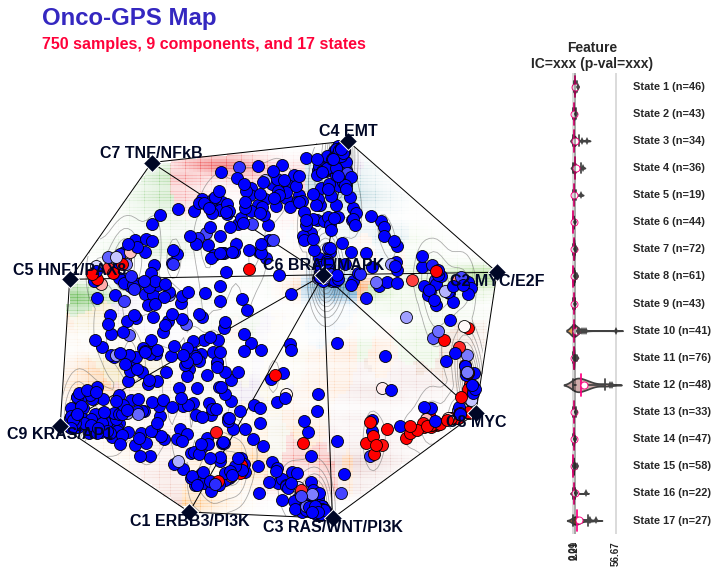

In [8]:
plot_onco_gps(h, 17, np.array(states_17_membership), annotations=np.array(rpkm.ix['BCL2', memberships['SAMPLE']]), output_filename='/home/cyborg/Desktop/kras17_bcl2.pdf')

In [9]:
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
cm = mpl.cm.bwr

/home/cyborg/tool/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


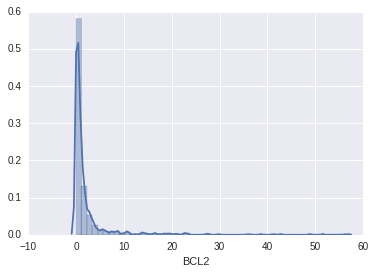

In [10]:
sns.distplot(rpkm.ix['BCL2', memberships['SAMPLE']])

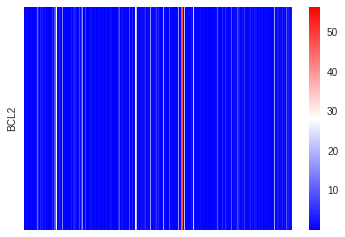

In [11]:
sns.heatmap(rpkm.ix[['BCL2'], memberships['SAMPLE']], cmap=cm, xticklabels=False)

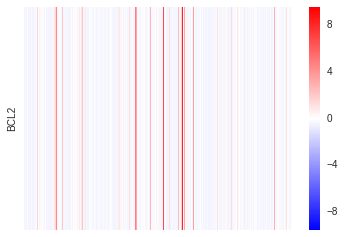

In [12]:
sns.heatmap((rpkm.ix[['BCL2'], memberships['SAMPLE']] - np.mean(rpkm.ix['BCL2', memberships['SAMPLE']])) / np.std(rpkm.ix['BCL2', memberships['SAMPLE']]), cmap=cm, xticklabels=False)

In [13]:
(rpkm.ix[['BCL2'], memberships['SAMPLE']] - np.mean(rpkm.ix['BCL2', memberships['SAMPLE']])) / np.std(rpkm.ix['BCL2', memberships['SAMPLE']])

,A101D_SKIN,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A2780_OVARY,A375_SKIN,A498_KIDNEY,A549_LUNG,A673_BONE,A704_KIDNEY,...,WM88_SKIN,WM983B_SKIN,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
BCL2,-0.082216,-0.295824,-0.385881,-0.109987,-0.206062,-0.226134,-0.264456,-0.385094,0.872705,0.662936,...,0.028195,0.17844,-0.388479,-0.356147,-0.271432,-0.367443,-0.243475,-0.313387,1.545263,0.086702
